In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import logsumexp
import math

# **Raizes de uma equação**



#Classes e métodos utilizados

In [107]:
class initializer:

  def __init__(self,function,initial_dots):

    self.function = function
    self.initial_dots = initial_dots
    self.result_table = []
  
  def generate_graph(self,save_graph = False,title = None,xlabel = None, ylabel = None ,name_fig = 'root_graph.png' ,start_graph=0,end_graph=0):

      
    dots = np.array(self.dots)

    xs = np.linspace(dots[0]-start_graph, dots[-1]+end_graph, 1000)
    y = [self.function(x) for x in xs]

    plt.plot(xs,y)
    plt.plot(self.dots,[self.function(dot) for dot in self.dots],'xb')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    if save_graph:
      plt.savefig(name_fig, format='png')
    plt.show()
 

class method_newton_raphson(initializer):

  def __init__(self,function,initial_dots):

    super().__init__(function,initial_dots)
  
  def find_root(self,deltaX,error,max_tries):

    [self.dots,self.deltaX,count,old_dot]=[[],deltaX,0,self.initial_dots]
    self.result_table.append([self.function(self.initial_dots),self.initial_dots])

    while(True):

      self.dots.append(old_dot)
      new_dot = old_dot - self.function(old_dot)/self.derivate(old_dot)
      
      self.result_table.append([self.function(new_dot),new_dot])
      
      if (abs((new_dot-old_dot))/new_dot <= error) or count == max_tries:
        break

      old_dot = new_dot
      count+=1

    self.result_table=pd.DataFrame(self.result_table).rename(columns={0:'f(x)',1:'x'})
    self.dots.append(new_dot)

  def derivate(self,xn):

    return (self.function(xn+self.deltaX)-self.function(xn))/(self.deltaX)


class bisection_method(initializer):

  def __init__(self,function,initial_dots):

    super().__init__(function,initial_dots)

  
  def find_root(self,error,max_tries):

    [self.dots,count,a,b]=[[],0,self.initial_dots[0],self.initial_dots[1]]

    old_middle_dot = (a+b)/2

    self.dots.append(old_middle_dot)

    while(True):

      if self.function(a)*self.function(old_middle_dot)>0:
        a = old_middle_dot
      else:
        b = old_middle_dot

      new_middle_dot = (a+b)/2

      self.result_table.append([self.function(new_middle_dot),a,new_middle_dot,b])

      if count==max_tries or (abs((new_middle_dot-old_middle_dot)/new_middle_dot))<error:
        break
      old_middle_dot = new_middle_dot
      
      self.dots.append(old_middle_dot)
      
      count+=1

    self.result_table=pd.DataFrame(self.result_table)

def apply_log_to_table_elements(table):

  new_table = []

  for i in range(len(table)):
    row = []
    for j in range(0,4):
      if j == 0:
        row.append(table.iloc[i,j])
      else:
        row.append(-np.log10(table.iloc[i,j]))
    new_table.append(row)

  return pd.DataFrame(new_table).rename(columns={0:'f(x)',1:'PH de a',2:'PH de c',3:'PH de b'})
  

#Projeto 2:

,f(x),hidro. de a,hidro. de c,hidro. de b
0,-1.562499e-08,1.000000e-12,0.002500,0.005000
1,-1.953118e-09,1.000000e-12,0.001250,0.002500
2,-2.441372e-10,1.000000e-12,0.000625,0.001250
3,-3.051586e-11,1.000000e-12,0.000313,0.000625
4,-3.813840e-12,1.000000e-12,0.000156,0.000313
5,-4.764087e-13,1.000000e-12,0.000078,0.000156
6,-5.939043e-14,1.000000e-12,0.000039,0.000078
7,-7.343470e-15,1.000000e-12,0.000020,0.000039
8,-8.777669e-16,1.000000e-12,0.000010,0.000020
9,-8.963714e-17,1.000000e-12,0.000005,0.000010


,f(x),PH de a,PH de c,PH de b
0,-1.562499e-08,12.000000,2.602060,2.301030
1,-1.953118e-09,12.000000,2.903090,2.602060
2,-2.441372e-10,12.000000,3.204120,2.903090
3,-3.051586e-11,12.000000,3.505150,3.204120
4,-3.813840e-12,12.000000,3.806180,3.505150
5,-4.764087e-13,12.000000,4.107210,3.806180
6,-5.939043e-14,12.000000,4.408240,4.107210
7,-7.343470e-15,12.000000,4.709270,4.408240
8,-8.777669e-16,12.000000,5.010300,4.709270
9,-8.963714e-17,12.000000,5.311330,5.010300


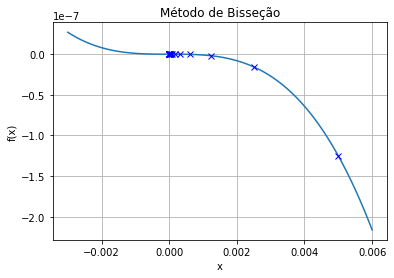

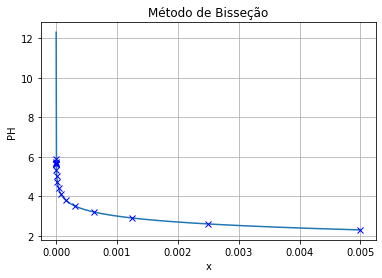

In [109]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),315]

function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,[10**(-12),10**(-2)])
result = bisection.find_root(0.01,1000)
bisection.result_table = bisection.result_table.rename(columns={0:'f(x)',1:'hidro. de a',2:'hidro. de c',3:'hidro. de b'})
display(bisection.result_table)
table_ph = apply_log_to_table_elements(bisection.result_table)
display(table_ph)
bisection.generate_graph(title = 'Método de Bisseção',xlabel = 'x',ylabel = 'f(x)',start_graph= 0.008,end_graph=0.006)
bisection.function = lambda  x: -np.log10(x)
bisection.generate_graph(title = 'Método de Bisseção',xlabel = 'x',ylabel = 'PH',start_graph= 0.005,end_graph=0.005)


,f(x),hidro. de a,hidro. de c,hidro. de b
0,-1.562498e-08,1.000000e-12,0.002500,0.005000
1,-1.953117e-09,1.000000e-12,0.001250,0.002500
2,-2.441365e-10,1.000000e-12,0.000625,0.001250
3,-3.051554e-11,1.000000e-12,0.000313,0.000625
4,-3.813678e-12,1.000000e-12,0.000156,0.000313
5,-4.763273e-13,1.000000e-12,0.000078,0.000156
6,-5.934970e-14,1.000000e-12,0.000039,0.000078
7,-7.323105e-15,1.000000e-12,0.000020,0.000039
8,-8.675844e-16,1.000000e-12,0.000010,0.000020
9,-8.454582e-17,1.000000e-12,0.000005,0.000010


,f(x),PH de a,PH de c,PH de b
0,-1.562498e-08,12.000000,2.602060,2.301030
1,-1.953117e-09,12.000000,2.903090,2.602060
2,-2.441365e-10,12.000000,3.204120,2.903090
3,-3.051554e-11,12.000000,3.505150,3.204120
4,-3.813678e-12,12.000000,3.806180,3.505150
5,-4.763273e-13,12.000000,4.107210,3.806180
6,-5.934970e-14,12.000000,4.408240,4.107210
7,-7.323105e-15,12.000000,4.709270,4.408240
8,-8.675844e-16,12.000000,5.010300,4.709270
9,-8.454582e-17,12.000000,5.311330,5.010300


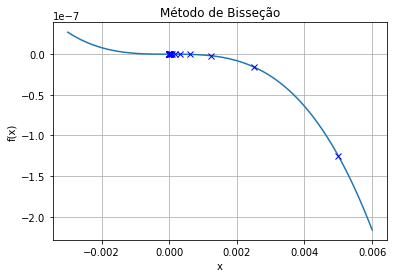

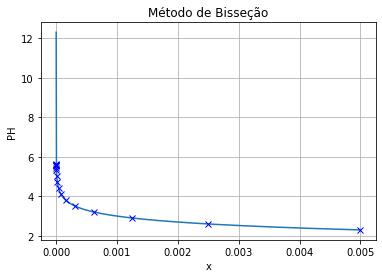

In [110]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),375]

function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,[10**(-12),10**(-2)])
result = bisection.find_root(0.01,1000)
bisection.result_table = bisection.result_table.rename(columns={0:'f(x)',1:'hidro. de a',2:'hidro. de c',3:'hidro. de b'})
display(bisection.result_table)
table_ph = apply_log_to_table_elements(bisection.result_table)
display(table_ph)
bisection.generate_graph(title = 'Método de Bisseção',xlabel = 'x',ylabel = 'f(x)',start_graph= 0.008,end_graph=0.006)
bisection.function = lambda  x: -np.log10(x)
bisection.generate_graph(title = 'Método de Bisseção',xlabel = 'x',ylabel = 'PH',start_graph= 0.005,end_graph=0.005)


#Projeto 4:

,f(x),x
0,-1.004989,0.040000
1,0.701981,0.023697
2,-0.070947,0.029592
3,0.018526,0.028808
4,-0.004394,0.029006


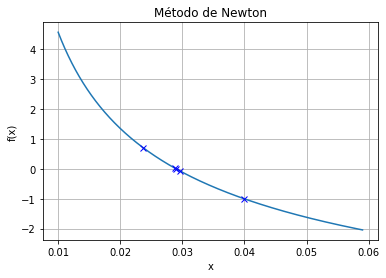

In [111]:
re = (1.23*40*0.005)/0.0000179
function = lambda x: 1/((x)**(1/2)) +  2*np.log10(0.0000015/(3.7*0.005) +(2.51)/(( (x**(1/2))*(re) )) ) 

newton = method_newton_raphson(function,0.04)
newton.find_root(0.01,0.01,100)
display(newton.result_table)
newton.generate_graph(title = 'Método de Newton',xlabel = 'x',ylabel = 'f(x)',start_graph= 0.03,end_graph=0.03)

,f(x),a,c,b
0,0.369999,0.008000,0.026000,0.044000
1,-0.606359,0.026000,0.035000,0.044000
2,-0.170273,0.026000,0.030500,0.035000
3,0.084313,0.026000,0.028250,0.030500
4,-0.046499,0.028250,0.029375,0.030500
5,0.017985,0.028250,0.028812,0.029375
6,-0.014482,0.028812,0.029094,0.029375


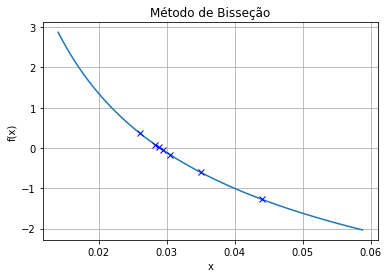

In [119]:
re = (1.23*40*0.005)/0.0000179
function = lambda x: 1/((x)**(1/2)) +  2*np.log10(0.0000015/(3.7*0.005) +(2.51)/(( (x**(1/2))*(re) )) ) 

bisection = bisection_method(function,[0.008,0.08])
result = bisection.find_root(0.01,1000)
display(bisection.result_table.rename(columns = {0:'f(x)',1:'a',2:'c',3:'b'}))
bisection.generate_graph(title = 'Método de Bisseção',xlabel = 'x',ylabel = 'f(x)',start_graph= 0.03,end_graph=0.03)

,f(x),x
0,-1.004989,0.040000
1,0.701981,0.023697
2,-0.070947,0.029592
3,0.018526,0.028808
4,-0.004394,0.029006


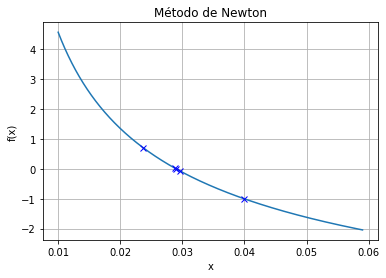

In [122]:
re = (1.23*40*0.005)/0.0000179
function = lambda x: 1/((x)**(1/2)) +  2*np.log10(0.0000015/(3.7*0.005) +(2.51)/(( (x**(1/2))*(re) )) ) 

newton = method_newton_raphson(function,0.04)
result = newton.find_root(0.01,0.01,1000)
display(newton.result_table)
newton.generate_graph(title = 'Método de Newton',xlabel = 'x',ylabel = 'f(x)',start_graph= 0.03,end_graph=0.03)